<a href="https://colab.research.google.com/github/preetamjumech/LLM/blob/main/Extract_Image_%26_Image_Info_From_PDF_%26_Use_LlaVa_Explain_Image_LangChain_05_11_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
%pip install "unstructured[all-docs]" unstructured-client watermark

In [2]:
# Warning control
import warnings
warnings.filterwarnings('ignore')

In [3]:
from IPython.display import JSON

import json

from unstructured_client import UnstructuredClient
from unstructured_client.models import shared
from unstructured_client.models.errors import SDKError

from unstructured.partition.pdf import partition_pdf
from unstructured.staging.base import dict_to_elements, elements_to_json

In [4]:
%load_ext watermark

In [5]:
import unstructured

In [6]:
%watermark --iversions

unstructured_client: 0.27.0
unstructured       : 0.16.4
json               : 2.0.9
IPython            : 7.34.0



In [7]:
import unstructured.partition

help(unstructured.partition)

Help on package unstructured.partition in unstructured:

NAME
    unstructured.partition

PACKAGE CONTENTS
    api
    auto
    common (package)
    csv
    doc
    docx
    email
    epub
    html (package)
    image
    json
    md
    model_init
    msg
    odt
    org
    pdf
    pdf_image (package)
    ppt
    pptx
    rst
    rtf
    strategies
    text
    text_type
    tsv
    utils (package)
    xlsx
    xml

FILE
    /usr/local/lib/python3.10/dist-packages/unstructured/partition/__init__.py




In [11]:
!apt-get install -y poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.5 [186 kB]
Fetched 186 kB in 2s (120 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 123623 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.5_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.5) ...
Setting up poppler-utils (22.02.0-2ubuntu0.5) ...
Processing triggers for man-db (2.10.2-1) ...


In [12]:
!apt-get install -y tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 4s (1,094 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123653 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [13]:
!pip install -U nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 14.5 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


In [1]:
import nltk
nltk.download('punkt', download_dir='/root/nltk_data')
nltk.download('punkt_tab', download_dir='/root/nltk_data')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [2]:
import nltk
print(nltk.__version__) #must be 3.9.1

3.9.1


In [3]:
from unstructured.partition.pdf import partition_pdf

# Specify the path to your PDF file
filename = "/content/gpt4all.pdf"

# Call the partition_pdf function
# Returns a List[Element] present in the pages of the parsed pdf document
elements = partition_pdf(filename)

# Now, elements is a list of all elements present in the pages of the parsed pdf document

In [4]:
elements

In [5]:
len(elements)

134

In [7]:
import json
element_dict = [el.to_dict() for el in elements]
output = json.dumps(element_dict, indent=2)
print(output)

[
  {
    "type": "UncategorizedText",
    "element_id": "b0c5cfcf93a217591e27d5c97845f59b",
    "text": "3 2 0 2",
    "metadata": {
      "coordinates": {
        "points": [
          [
            16.34,
            263.81000000000006
          ],
          [
            16.34,
            303.81000000000006
          ],
          [
            36.34,
            303.81000000000006
          ],
          [
            36.34,
            263.81000000000006
          ]
        ],
        "system": "PixelSpace",
        "layout_width": 595.276,
        "layout_height": 841.89
      },
      "file_directory": "/content",
      "filename": "gpt4all.pdf",
      "languages": [
        "eng"
      ],
      "last_modified": "2024-11-05T17:20:45",
      "page_number": 1,
      "filetype": "application/pdf"
    }
  },
  {
    "type": "Title",
    "element_id": "d71e9973e25dde0d96dc422b5a8fd429",
    "text": "v o N 6",
    "metadata": {
      "coordinates": {
        "points": [
          [
  

In [8]:
unique_types = set()

for item in element_dict:
    unique_types.add(item['type'])

print(unique_types)

{'UncategorizedText', 'NarrativeText', 'Title'}


In [9]:
#We will have to specify the strategy parameter as hi_res. This will use a combination of computer vision and Optical Character Recognition (OCR)
#to extract the tables and maintain the structure.
from unstructured.partition.pdf import partition_pdf

elements = partition_pdf(filename=filename,
                     strategy='hi_res',
           )

yolox_l0.05.onnx:   0%|          | 0.00/217M [00:00<?, ?B/s]

In [10]:
element_dict = [el.to_dict() for el in elements]

unique_types = set()

for item in element_dict:
    unique_types.add(item['type'])

print(unique_types)

{'UncategorizedText', 'FigureCaption', 'EmailAddress', 'Footer', 'ListItem', 'NarrativeText', 'Header', 'Table', 'Title', 'Image'}


In [12]:
images = [el for el in elements if el.category == "Image"]
print(len(images))

5


In [14]:
print(images[4].text)
print(images[4].metadata.text_as_html)

Github Repo Growth — opraall — UamMa — Alpaca 50000 40000 30000 Github Stars 20000 10000 0 20 40 60 80 100 120 140 Days Since Launch
None


In [15]:
# Get elements
path = "images"
raw_pdf_elements = partition_pdf(filename=filename,
                                 # Unstructured first finds embedded image blocks
                                 # Only applicable if `strategy=hi_res`
                                 extract_images_in_pdf=True,
                                 strategy = "hi_res",
                                 infer_table_structure=True,
                                 # Only applicable if `strategy=hi_res`
                                 extract_image_block_output_dir = path,
                                 )

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

In [16]:
element_dict = [el.to_dict() for el in raw_pdf_elements]

unique_types = set()

for item in element_dict:
    unique_types.add(item['type'])

print(unique_types)

{'UncategorizedText', 'FigureCaption', 'EmailAddress', 'Footer', 'ListItem', 'NarrativeText', 'Header', 'Table', 'Title', 'Image'}


In [17]:
images = [el for el in raw_pdf_elements if el.category == "Image"]

print(images[4].text)
print(images[4].metadata.text_as_html)

Github Repo Growth — opraall — UamMa — Alpaca 50000 40000 30000 Github Stars 20000 10000 0 20 40 60 80 100 120 140 Days Since Launch
None


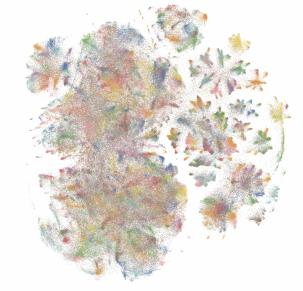

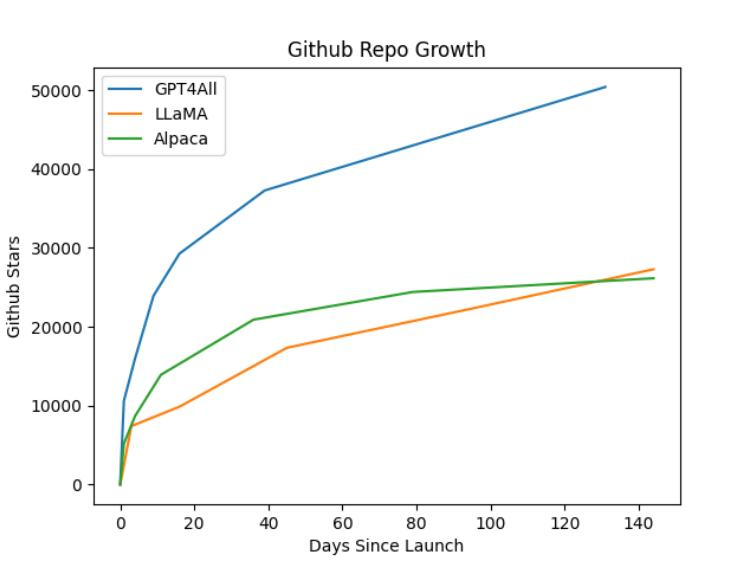

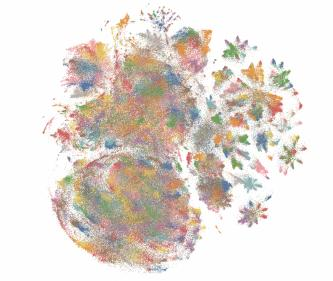

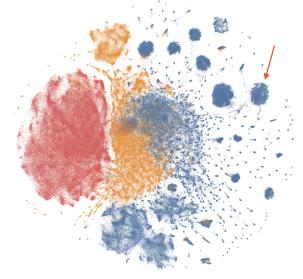

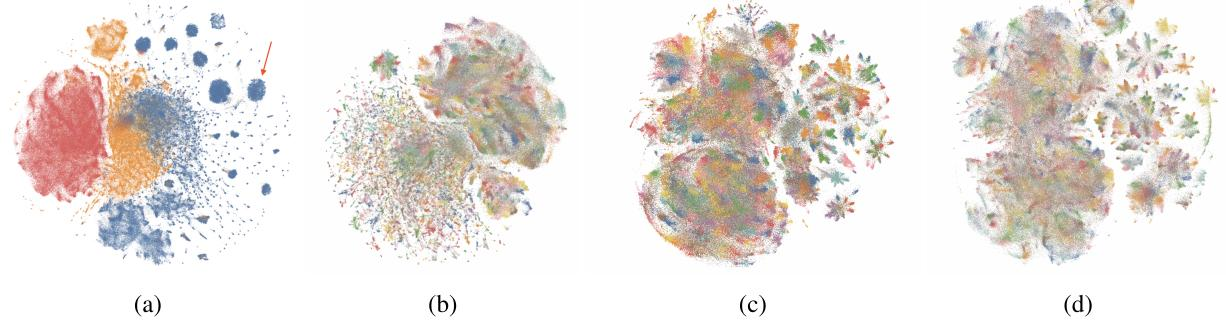

In [18]:
from IPython.display import Image, display
import glob

# Define the path to the folder containing the images
folder_path = "images/*.jpg"  # Update the file type as needed

# Use glob to search for JPG files in the specified folder
image_files = glob.glob(folder_path)

# Iterate through the list of image files and display each image inline
for image_file in image_files:
    display(Image(filename=image_file))

In [19]:
%%capture
%pip install langchain langchain_core langchain_community

In [21]:
import PIL
print(PIL.__version__)

10.4.0



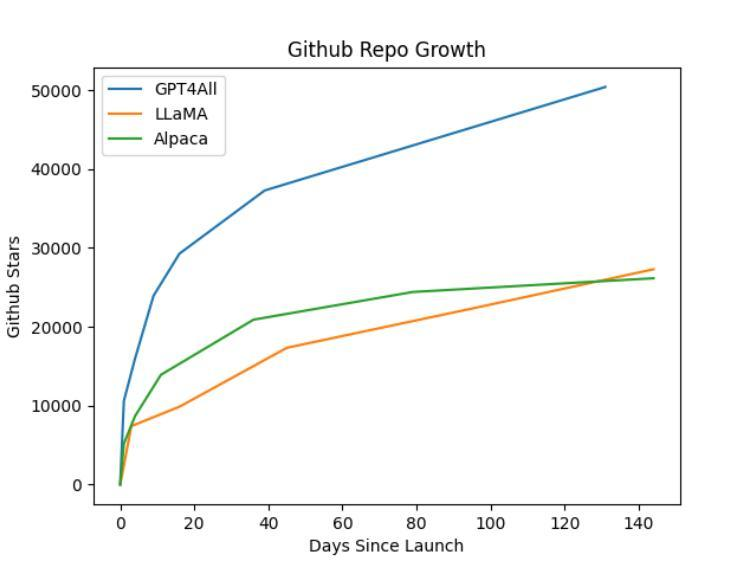

In [22]:
import base64
from io import BytesIO

from IPython.display import HTML, display
from PIL import Image


def convert_to_base64(pil_image):
    """
    Convert PIL images to Base64 encoded strings

    :param pil_image: PIL image
    :return: Re-sized Base64 string
    """

    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")  # You can change the format if needed
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str


def plt_img_base64(img_base64):
    """
    Display base64 encoded string as image

    :param img_base64:  Base64 string
    """
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # Display the image by rendering the HTML
    display(HTML(image_html))


file_path = "./images/figure-4-5.jpg"
pil_image = Image.open(file_path)
image_b64 = convert_to_base64(pil_image)
plt_img_base64(image_b64)

In [23]:
# from langchain_community.llms import Ollama
# llm = Ollama(model="llava:7b")
#llm_with_image_context = llm.bind(images=[image_b64])
#llm_with_image_context.invoke("Explain the image")

In [24]:
!pip install transformers torch pillow requests

In [35]:
import requests
from PIL import Image
from transformers import Blip2Processor, Blip2ForConditionalGeneration

processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [36]:
# Load the image from the local file path
img_path = '/content/images/figure-4-5.jpg'  # Local file path
raw_image = Image.open(img_path).convert('RGB')

In [37]:
question = "what is this image about? "
inputs = processor(raw_image, question, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True).strip())

In [38]:
out

tensor([[   2, 1437, 1437, 1437, 1437, 1437, 1437, 1437, 1437, 1437, 1437, 1437]])

In [39]:
processor.decode(out[0], skip_special_tokens=True).strip()

''